In [1]:
import os

import pandas as pd
import geopandas as gpd

from datetime import datetime 
import statsmodels.api as sm

import numpy as np

import rasterstats as rs

import rasterio
from rasterio.plot import show

import scipy
from scipy.optimize import curve_fit


import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

In [2]:
import pumpingtest

# Calculate drawdown

## One point

In [6]:
s = pumpingtest.Theis(100,1000,20,T=50,Ss=0.01,mode=0)
print(s)

-0.11578309956244454


## Multiple Distances and Times

### Hantush Leaky (1960)

Text(0.5, 0, 'Minutes')

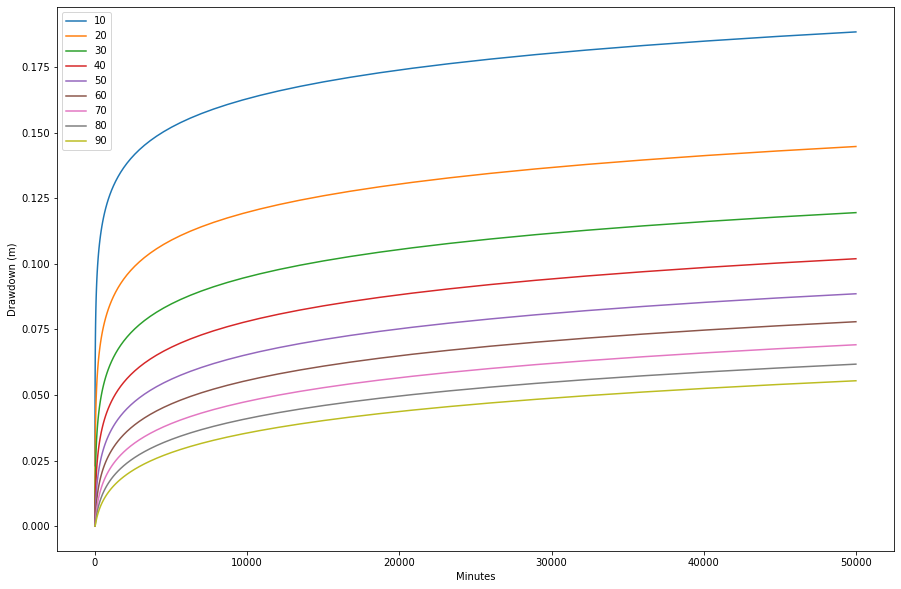

In [9]:
s={}
trange = np.geomspace(1, 50000, num=100)
drange = np.arange(10,100,10)
for d in drange:
    s[d] = []
    for t in trange:
    
        s[d].append(pumpingtest.ShortStorage(d,t,-20,T=50,Ss=0.01))

    plt.plot(trange,s[d],label=d)
plt.legend()
plt.ylabel('Drawdown (m)')
plt.xlabel('Minutes')

### Hantush and Jacob (1955)

Text(0.5, 0, 'Minutes')

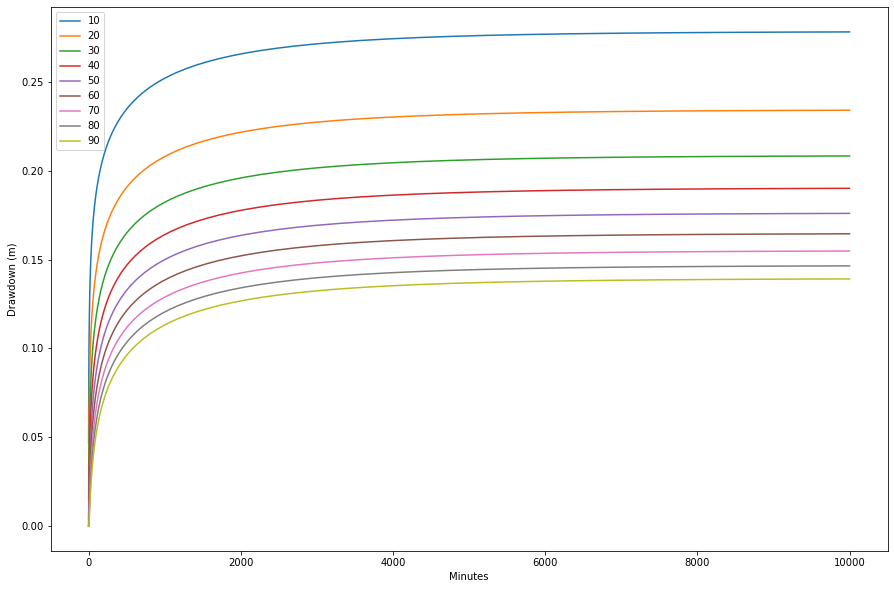

In [14]:
s={}
trange = np.geomspace(1, 10000, num=100)
drange = np.arange(10,100,10)
for d in drange:
    s[d] = []
    for t in trange:
    
        s[d].append(pumpingtest.Hantush(d,t,Q=-20,T=50,Ss=0.01))
    plt.plot(trange,s[d],label=d)
plt.legend()
plt.ylabel('Drawdown (m)')
plt.xlabel('Minutes')

### Theis (1935)

Text(0.5, 0, 'Minutes')

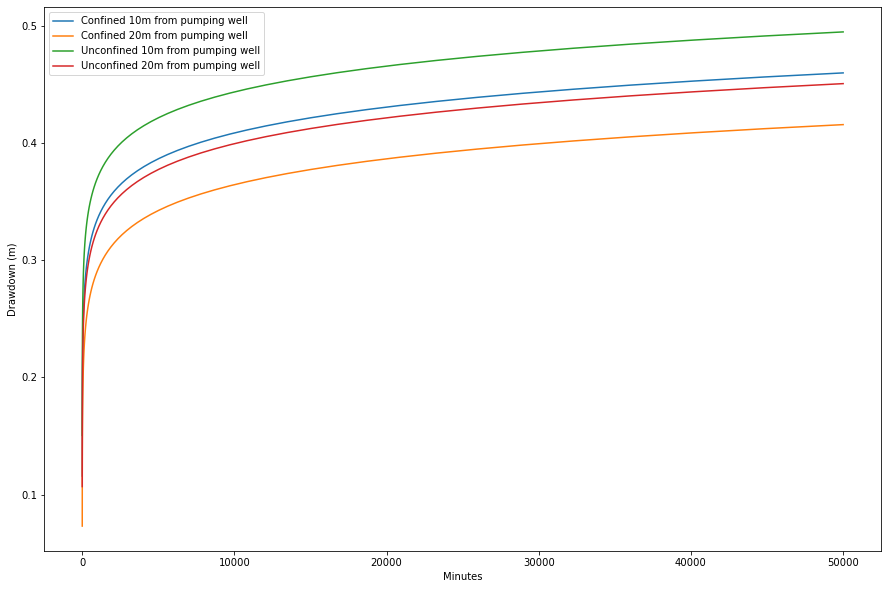

In [16]:
s={}
trange = np.geomspace(1, 50000, num=100)
drange = np.arange(10,30,10)
for d in drange:
    s[d] = []
    for t in trange:
    
        s[d].append(pumpingtest.Theis(d,t,Q=-20,T=50,Sy=0.01,mode=0))
    plt.plot(trange,s[d],label=f"Confined {d}m from pumping well")
    
for d in drange:
    s[d] = []
    for t in trange:
    
        s[d].append(pumpingtest.Theis(d,t,Q=-20,T=50,Sy=0.01,mode=1))
    plt.plot(trange,s[d],label=f"Unconfined {d}m from pumping well")
plt.legend()
plt.ylabel('Drawdown (m)')
plt.xlabel('Minutes')

## Superposition of Pumping and Distance

Define two dataframes with pumping schedules

In [22]:
pumpa = pd.DataFrame({'minutes':[10,20,60,120],"flow":[10,20,15,0]}).set_index('minutes')
pumpb = pd.DataFrame({'minutes':[10,30,50,60,100],"flow":[0,5,0,15,0]}).set_index('minutes')
print(pumpb)

         flow
minutes      
10          0
30          5
50          0
60         15
100         0


### Two Methods mutiple pumping rates

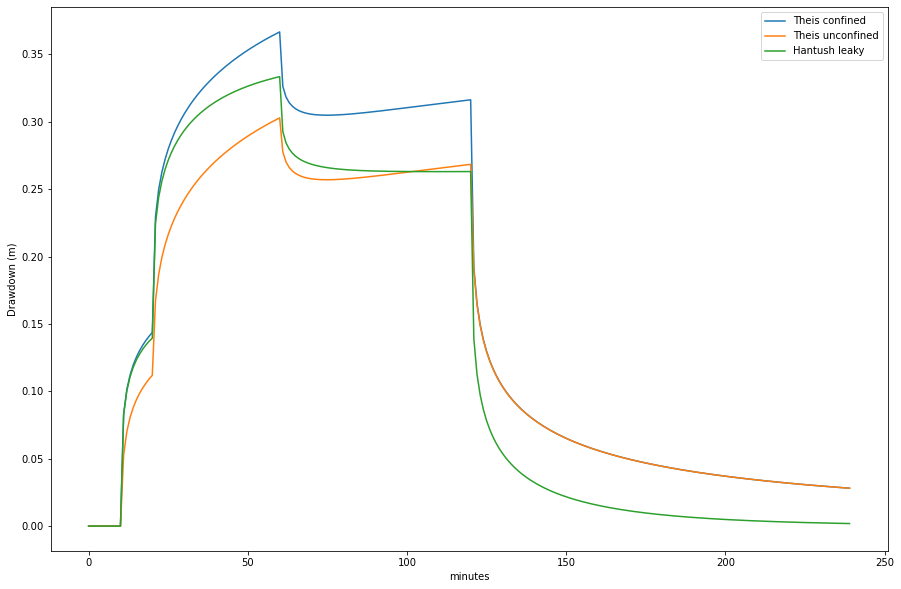

In [26]:
theisinput = {'T':30, 'K':1, 'b':30, 'Ss':0.001, 'mode':0}
theis2input = {'T':30, 'K':1, 'b':30, 'Ss':0.001, 'mode':1}
hantushinput = {'T':30, 'K':1, 'b':30, 'Ss':0.001,'Kc':0.005, 'bc':10}
pumpingtest.variable_q(pumpa, 10, pumpingtest.Theis, **theisinput).plot(label='Theis confined')
pumpingtest.variable_q(pumpa, 10, pumpingtest.Theis, **theis2input).plot(label='Theis unconfined')
pumpingtest.variable_q(pumpa, 10, pumpingtest.Hantush,**hantushinput).plot(label='Hantush leaky')
plt.ylabel('Drawdown (m)')
plt.xlabel('minutes')
plt.legend()

### Multiple distances and pumping rates

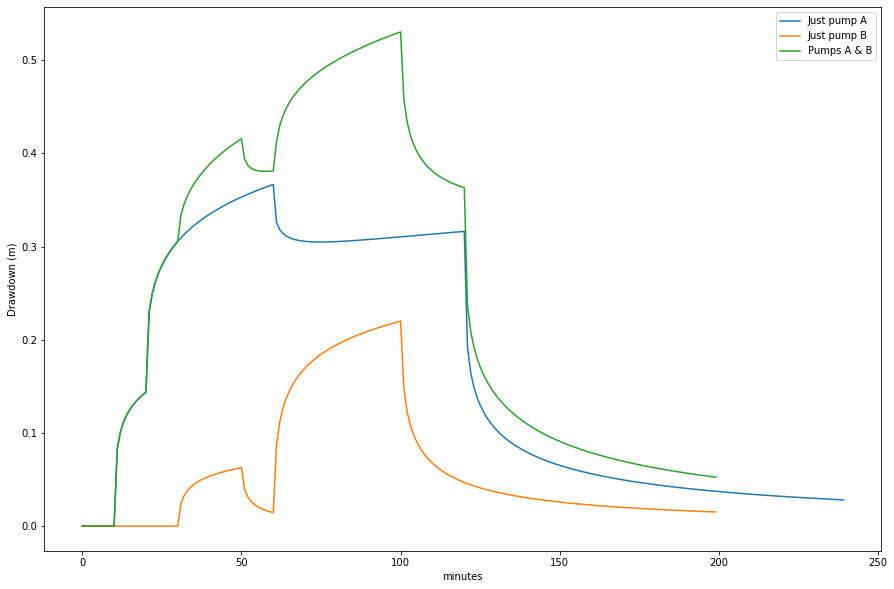

In [29]:
theisinput = {'T':30, 'K':1, 'b':30, 'Ss':0.001, 'mode':0}

pumpingtest.variable_q(pumpa, 10, pumpingtest.Theis, **theisinput).plot(label='Just pump A')
pumpingtest.variable_q(pumpb, 20, pumpingtest.Theis, **theisinput).plot(label='Just pump B')
combined = pumpingtest.variable_q(pumpa, 10, pumpingtest.Theis, **theisinput) \
+ pumpingtest.variable_q(pumpb, 20, pumpingtest.Theis, **theisinput)
combined.plot(label = "Pumps A & B")

plt.ylabel('Drawdown (m)')
plt.xlabel('minutes')
plt.legend()